In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from skopt.space import Integer
from numpy import mean
from skopt.utils import use_named_args
import numpy as np
#
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error

In [68]:
dataset = pd.read_csv('./Dataset/dataset.csv')

features = ["Freq"]
targets = ["W", "L", "Lf", "Lg", "X_g","Wg"]
# targets = ["W", "L", "Lf"]
x = dataset[features]
y = dataset[targets]
print (y)

               W           L       Lf        Lg       X_g        Wg
0     238.238000  143.877550  18.1740  34.26241  9.092260  6.289900
1     238.238000  115.351969  18.1740  34.26241  9.092260  6.289900
2     238.238000  115.072306  18.1740  34.26241  9.092260  6.289900
3     238.238000  103.885803  18.1740  34.26241  9.092260  6.289900
4     238.238000  103.606141  18.1740  34.26241  9.092260  6.289900
...          ...         ...      ...       ...       ...       ...
1037   12.713793   11.617689  18.2363   3.64714  3.867122  2.953568
1038   12.708391   11.617689  18.2363   3.64714  3.867122  2.953568
1039   12.702990   11.617689  18.2363   3.64714  3.867122  2.953568
1040   12.697588   11.617689  18.2363   3.64714  3.867122  2.953568
1041   12.692187   11.617689  18.2363   3.64714  3.867122  2.953568

[1042 rows x 6 columns]


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [45]:
search_space = [Integer(1, 1000, name='n_estimators'),Integer(1, 100, name='max_depth'), Integer(2, 100, name='min_samples_split'),Integer(1, 100, name='min_samples_leaf')]

In [ ]:
@use_named_args(search_space)
def evaluate_model(**params):
    model = RandomForestRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    error = mean((y_test - y_pred) ** 2)  
   # print(error)
    return error

In [57]:
result = gp_minimize(evaluate_model, search_space)

43.03544853613428
19.713014634534623
3.08226057406801
28.36856128629793
3.4808404322770534
1.8066358366713644
43.15204713583252
43.004254073637036
7.8538460965287475
15.55538185087848
2.3292058593708544
1.7682629237177996
1.9028288962979782
1.881877520848299
1.9799138801904297
2.2204394214373746
1.6963449042155518
1.588519023002624
1.8937043964300566
1.4378912917279465
1.5412170737258226
1.6955825586012818
1.4653938724245363
1.4999830183417395
136.55722881829152
1.6258329730810177
1.800183599325773
1.503599065866424
44.10105819534917
135.41776034183104
1.4509820088210277
1.4399295564819279
1.731426171345328
1.4135217532201372
1.5020266079428117
1.4528706496376784
1.970329136905822
1.3316128555839715
1.6947329387119914
1.5289697640249238
1.827420521757884
1.6721461108050568
2.715596753647574
1.389897943334494
43.40403010011143
1.6147637151723888
1.9173673777818845
1.757754241015344
2.157024953303311
1.7186969376109638
1.6113935995363435
1.6190414035346516
1.7046095335524025
1.6873610128

In [58]:
best_max_depth = result.x[0]
best_min_samples_split = result.x[1]
best_model = RandomForestRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_model.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=1, min_samples_split=66)

In [59]:
new_dataset = pd.read_csv('./Dataset/dataset.csv')  
new_data = new_dataset["Freq"].values.reshape(-1, 1)  
# Scaling 
new_data_scaled = scaler.transform(new_data)
# Predict
y_pred = best_model.predict(x_test_scaled)

c:\Users\mcr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: max_depth=%d, min_samples_split=%d' % (result.x[0], result.x[1]))
print("Predictions:", y_pred)

Best Accuracy: -0.212
Best Parameters: max_depth=1, min_samples_split=66
Predictions: [[29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 ...
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]]


In [61]:
new_data_scaled = scaler.transform(x_test)
# Predict
y_pred = best_model.predict(new_data_scaled)

print('Giá trị dự đoán:', y_pred)

Giá trị dự đoán: [[29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 ...
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]
 [29.64607824 21.37356146 16.93731128  5.08031142  5.30250808  3.01371276]]


Giá trị nhập vào là:  2.4
Giá trị dự đoán: [[48.37027715 29.54773298 15.74497091  5.37271406  5.3300639   3.11]]
Giá trị nhập vào là:  1.8
Giá trị dự đoán: [[70.23865393 39.40084539 13.297728    5.6459662   6.0883398   3.11]]
Giá trị nhập vào là:  1.5
Giá trị dự đoán: [[91.75532953 47.57821173 13.31375476  4.98681313  5.12805706  3.11]]
Giá trị nhập vào là:  1.2
Giá trị dự đoán: [[123.06514914  59.91222117  13.50473738   5.48772322   5.75246028   3.0998428 ]]

In [62]:
from sklearn import preprocessing
def regression_report(y_true, y_pred):
    y_pred = preprocessing.normalize(y_pred)
    y_true = preprocessing.normalize(y_true)
    # print(y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)

    # Mean Bias Deviation (MBD)
    mbd = np.mean(y_pred - y_true)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    smape = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

    report = pd.DataFrame({
        'Metric': [
            'Mean Absolute Error (MAE)',
            'Mean Squared Error (MSE)',
            'Root Mean Squared Error (RMSE)',
            'R² Score',
            'Explained Variance Score',
            'Median Absolute Error',
            'Mean Bias Deviation (MBD)',
            'Mean Absolute Percentage Error (MAPE)',
            'Symmetric Mean Absolute Percentage Error (sMAPE)'
        ],
        'Gausians': [mae, mse, rmse, r2, explained_variance, median_ae, mbd, mape, smape]
    })

    return report

report = regression_report(y_test, y_pred)
print(report)

                                             Metric   Gausians
0                         Mean Absolute Error (MAE)   0.067528
1                          Mean Squared Error (MSE)   0.009640
2                    Root Mean Squared Error (RMSE)   0.098181
3                                          R² Score   0.308972
4                          Explained Variance Score   0.381172
5                             Median Absolute Error   0.066095
6                         Mean Bias Deviation (MBD)  -0.000987
7             Mean Absolute Percentage Error (MAPE)  31.676039
8  Symmetric Mean Absolute Percentage Error (sMAPE)  27.713428


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

In [64]:
pred_val = pd.DataFrame(y_pred)
# print(pred_val)
y_test = y_test.reset_index(drop=True)
true_val_W = y_test['W']
true_val_L = y_test['L']
true_val_Lf = y_test['Lf']

pred_val_W = pred_val[0]
pred_val_L = pred_val[1]
pred_val_Lf = pred_val[2]

# print("y_test",y_test)

# print("pred_val",pred_val)

result = pd.concat([y_test, pred_val], axis=1)

result['Err_W'] = y_test['W'] - pred_val[0]
result['Err_L'] = y_test['L'] - pred_val[1]
result['Err_Lf'] = y_test['Lf'] - pred_val[2]

print(result['Err_W'])



0      -7.395512
1      48.293547
2      35.509655
3     -10.600778
4     -58.601223
         ...    
204   -16.462378
205    -8.636912
206     1.151622
207   -16.436100
208    28.907860
Name: Err_W, Length: 209, dtype: float64


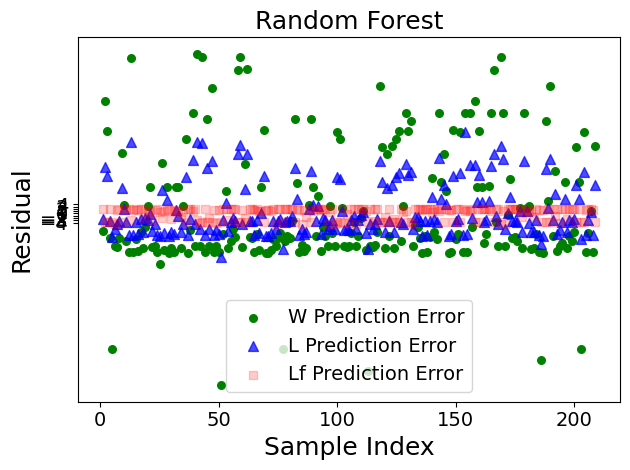

In [66]:
sample_indices = list(range(1, len(true_val_W) + 1))

plt.scatter(sample_indices, result['Err_W'], label='W Prediction Error', color='green', s=30, alpha= 1, marker='o')
plt.scatter(sample_indices, result['Err_L'], label='L Prediction Error', color='blue', s=50, alpha= 0.7, marker='^')
plt.scatter(sample_indices, result['Err_Lf'], label='Lf Prediction Error', color='red', s=40, alpha= 0.2, marker='s')


plt.xlabel('Sample Index',fontsize=18)
plt.ylabel('Residual',fontsize=18)
plt.title('Random Forest',fontsize=18)
# plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(np.arange(0, 210, 50),fontsize=14)
plt.yticks(np.arange(-4, 5, 1),fontsize=14)
# plt.xticks(sample_indices)
plt.tight_layout()
plt.show()